# Monte Carlo Simulation
Making a function that simulates grocery store sales

# Average grocery visot cost and number of visitors 
    
According to: https://www.foxbusiness.com/lifestyle/what-is-the-average-grocery-bill-for-one-person
The average grocery monthly bill is between 165 and 345 the average person going twice a month so we will divide 255 by 2 so 127$ will be the average visit cost.

According to: https://www.quora.com/What-is-the-average-foot-traffic-at-a-local-grocery-store
Even small stores get 2000 visitors a day we will be a slightly bigger store at 4000 per day average
 


In [36]:
import numpy as np
import pandas as pd
import random

# Simulate average visitors per day, avg margin per day and average amount spend per day per person
This assumes that each day people will buy a varying amount and types of products leading to various margins

In [37]:
#Simulate normal distribution of visitors with average amount of visitors is 4000 transactions per day
avg_customer = 4000 
std_dev = avg_customer * .10 # 10% standard deviation of average visitor amount for simplicity
num_days = 365


# Get variables needed to calculate the random margin
avg_margin = .0275 
std_dev_m = avg_margin * .10 # 10% standard deviation of average visitor amount for simplicity
num_dayz = 365

# Get random distribution for amount the average customer spends each day.
avg_spend = 127.5 
std_dev_s = avg_spend * .10 # 10% standard deviation of average visitor amount for simplicity
num_dayz2 = 365

In [38]:
# Simulating random number of visitors for a whole year.....
visitors = np.random.normal(avg_customer, std_dev, num_days).round(2)
margin = np.random.normal(avg_margin, std_dev_m, num_dayz)
spend = np.random.normal(avg_spend, std_dev_s, num_dayz2)

# Calculate Revenue 

In [39]:
df = pd.DataFrame(index=range(num_days), data={'num_visitors': visitors,
                                               'margin': margin,
                                               'spent': spend})

In [40]:
# Calculate the revenue, total proft and expenses 1- profit
df['revenue'] = df['num_visitors'] * df['spent'] # Calculate the total revenue
df['expenses'] = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
df['profit'] = df['revenue'] * df['margin'] # Calculate the profit
df.head()

,num_visitors,margin,spent,revenue,expenses,profit
0,4092.74,0.026492,124.474922,509443.491047,495947.484867,13496.006180
1,3737.94,0.030677,145.083381,542312.973328,525676.215643,16636.757685
2,4007.44,0.027556,115.212591,461707.545624,448984.612936,12722.932688
3,4432.08,0.029647,115.781806,513154.226698,497940.706505,15213.520193
4,4160.89,0.024985,113.309969,471470.316393,459690.641583,11779.674809


# Simulation time

In [131]:
#Simulate normal distribution of visitors with average amount of visitors is 4000 transactions per day
avg_customer = 4000 
std_dev = avg_customer * .10 # 10% standard deviation of average visitor amount for simplicity
num_days = 1825

# Get variables needed to calculate the random margin
avg_margin = .0275 
std_dev_m = avg_margin * .10 # 10% standard deviation of average visitor amount for simplicity

# Get random distribution for amount the average customer spends each day.
avg_spend = 127.5 
std_dev_s = avg_spend * .10 # 10% standard deviation of average visitor amount for simplicity

num_simulations = 100 # to simulate 10 years of 365 days

# list to keep all the results from each simulation 
profit_total = []
df3= pd.DataFrame([])

# Loop through many simulations
for i in range(num_simulations):


    # Simulating random visitors, average margin and spend per day for the store
    visitors = np.random.normal(avg_customer, std_dev, num_days).round(2)
margin = np.random.normal(avg_margin, std_dev_m, num_days)
spend = np.random.normal(avg_spend, std_dev_s, num_days)

df = pd.DataFrame(index=range(num_days), data={'num_visitors': visitors,
                                               'margin': margin,
                                               'spent': spend})
    
    # Calculate the revenue, total proft and expenses 1- profit
df['revenue'] = df['num_visitors'] * df['spent'] # Calculate the total revenue
df['expenses'] = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
df['profit'] = df['revenue'] * df['margin'] # Calculate the profit


    # We want to track the total revenue expenses and profit
profit_total.append([df['revenue'].sum().round(0),
                      df['expenses'].sum().round(0),
                      df['profit'].sum().round(0)])

df3 = df.append(df)

In [132]:
df3.shape

(3650, 6)

In [133]:
financials = pd.DataFrame.from_records(profit_total, columns=['revenue',
                                                           'expenses',
                                                           'profit'])
print(financials)

       revenue     expenses      profit
0  937040049.0  911234657.0  25805392.0


# SIMULATION NOW DIFFERENT METHOD
# for some reason the algorithm doubles the number of days and that is the number of maybe visitors = np.random.normal(avg_customer, std_dev, num_days).round(2) is the problem

In [119]:
#Simulate normal distribution of visitors with average amount of visitors is 4000 transactions per day
avg_customer = 4000 
std_dev = avg_customer * .10 # 10% standard deviation of average visitor amount for simplicity
num_days = 365

# Get variables needed to calculate the random margin
avg_margin = .0275 
std_dev_m = avg_margin * .10 # 10% standard deviation of average visitor amount for simplicity

# Get random distribution for amount the average customer spends each day.
avg_spend = 127.5 
std_dev_s = avg_spend * .10 # 10% standard deviation of average visitor amount for simplicity


np.random.seed(2015)

num_simulations = 100 # to simulate 10 years of 365 days

# list to keep all the results from each simulation 
revenue = []
expenses = []
profit = []

df2= pd.DataFrame([])

# Loop through many simulations
for i in range(num_simulations):
    # Simulating random visitors, average margin and spend per day for the store
    visitors = np.random.normal(avg_customer, std_dev, num_days).round(2)
margin = np.random.normal(avg_margin, std_dev_m, num_days)
spend = np.random.normal(avg_spend, std_dev_s, num_days)

df = pd.DataFrame(index=range(num_days), data={'num_visitors': visitors,
                                               'margin': margin,
                                               'spent': spend})
    
    # Calculate the revenue, total proft and expenses 1- profit
df['revenue'] = df['num_visitors'] * df['spent'] # Calculate the total revenue
df['expenses'] = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
df['profit'] = df['revenue'] * df['margin'] # Calculate the profit

revenue = df['num_visitors'] * df['spent'] # Calculate the total revenue
expenses = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
profit = df['revenue'] * df['margin'] # Calculate the profit


    # We want to track the total revenue expenses and profit
revenue.append(revenue)
expenses.append(expenses)
profit.append(profit)

 # We want to track the total revenue expenses and profit

results_df = pd.DataFrame()
results_df['revenue'] = revenue
results_df['expenses'] = expenses
results_df['profit'] = profit

df2 = df.append(df) # append a second way..........................

In [134]:
results_df.head()

,revenue,expenses,profit
0,744266.312579,724358.670969,19907.641611
1,470148.364962,456153.651535,13994.713426
2,610610.946283,594607.575616,16003.370667
3,438397.609789,425376.492968,13021.116821
4,417221.736905,404139.839782,13081.897123


In [121]:
df2.describe()

,num_visitors,margin,spent,revenue,expenses,profit
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4005.837781,0.027582,127.405213,510408.196980,496343.640763,14064.556217
std,421.357569,0.002767,12.431736,74305.444497,72385.975694,2400.544461
min,2350.330000,0.019167,89.110999,306546.728573,298317.308601,7524.469057
25%,3728.790000,0.025728,118.924981,461321.909869,447798.506983,12417.743212
50%,3986.000000,0.027651,127.029819,506818.181387,493350.796916,13946.666120
75%,4255.160000,0.029614,135.364746,552681.960553,537779.888271,15593.307624
max,5312.510000,0.034222,161.431263,750207.749080,730111.734931,21629.262187


Text(0, 0.5, 'Frequency')

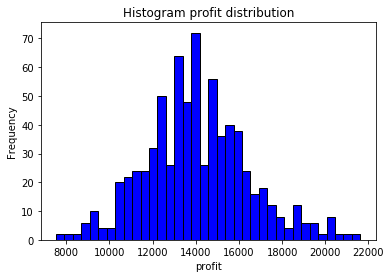

In [124]:
# matplotlib histogram
import matplotlib.pyplot as plt
plt.hist(df2['profit'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram profit distribution')
plt.xlabel('profit')
plt.ylabel('Frequency')